- run and interpret simulations using Python. Simulation is widely used in cases where estimates are required from complex    distributions of values or a hierarchy of distributions. 
- you will estimate the range of expected profitability for a lemonade stand. The profitability of the lemonade stand depends on the number of customers arriving, the profit from the drinks they order, and the tips the customer may or may not choose to leave. The distribution of possible profits is thus, the joint distribution of customer arrivals, items ordered, and tips. In practice, such a complex distribution cannot be analyzed except using simulation.

#### Computing Random Variables
Python offers comprehensive support for computing random variables from probability distributions. There is support in Python for a large number of distributions; e.g. Normal, Poisson, Beta. Additionally, you can define your own functions to compute specialized probability distributions. In this exercise, you will compute and evaluate named probability distributions using Python.
In this procedure, you will compute a random set of values representing the number of customer arrivals per day at the lemonade stand. This calculation assumes that the mean number of arrivals per day is 600, with a standard deviation of 30. In practice, these parameters would be known from past history.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nr

##### Create a Function to Plot Distributions


In [3]:
%matplotlib inline
def dist_summary(dist, names = 'dist_name'):
    ser = pd.Series(dist)
    fig = plt.figure(1, figsize=(9, 6))
    ax = fig.gca()
    ser.hist(ax = ax, bins = 120)
    ax.set_title('Frequency distribution of ' + names)
    ax.set_ylabel('Frequency')
    plt.show()
    return(ser.describe())

#### Simulate Customers Using a Normal Distribution
uses the **normal** function from the Python **numpy.random** 

In [5]:
def sim_normal(nums, mean = 600, sd = 30):
    for n in nums:
        dist = nr.normal(loc = mean, scale = sd, size = n)
        titl = 'Normal distribution with ' + str(n) + ' values'
        print('Summary for ' + str(n) + ' samples')
        print(dist_summary(dist, titl))   
        print('Emperical 95% CIs')
        print(np.percentile(dist, [2.5, 97.5]))
        print(' ')
    return('Done!')

Summary for 100 samples


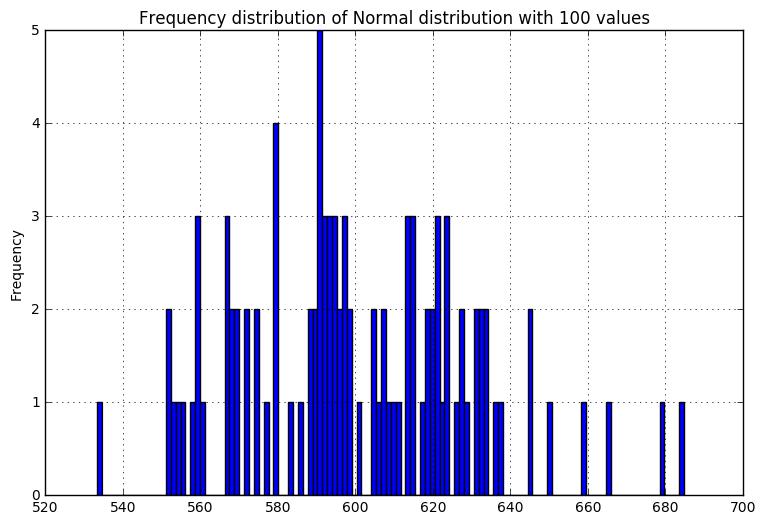

count    100.000000
mean     600.616395
std       29.183986
min      533.452242
25%      579.511730
50%      597.419870
75%      621.501706
max      684.795140
dtype: float64
Emperical 95% CIs
[ 552.38854073  662.025332  ]
 
Summary for 1000 samples


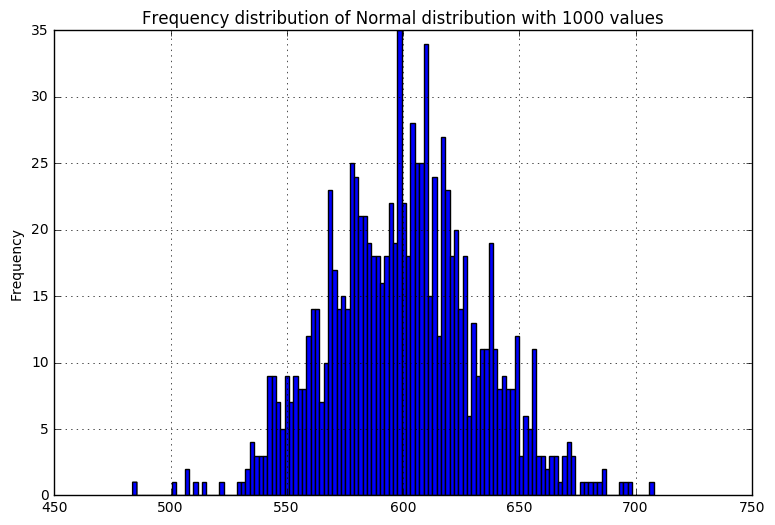

count    1000.000000
mean      600.211834
std        32.165341
min       483.703397
25%       578.503887
50%       600.514248
75%       620.462689
max       707.791549
dtype: float64
Emperical 95% CIs
[ 541.93270436  664.60051001]
 
Summary for 10000 samples


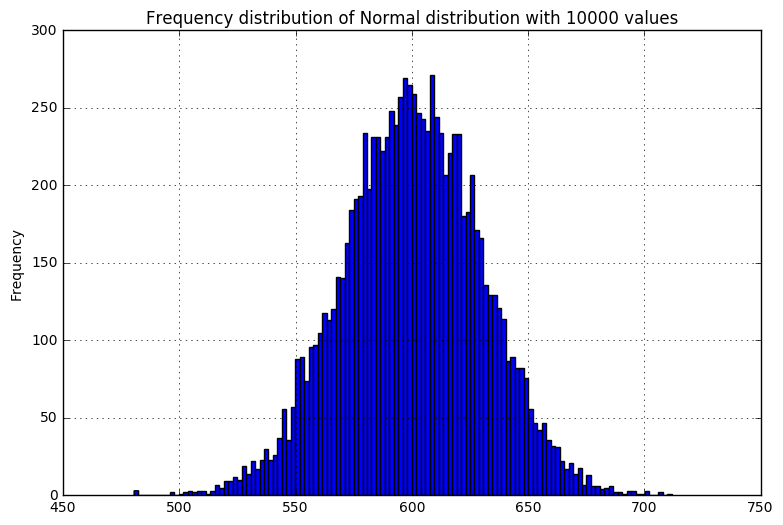

count    10000.000000
mean       600.169393
std         29.801580
min        480.537850
25%        580.109364
50%        600.157349
75%        620.349636
max        711.689013
dtype: float64
Emperical 95% CIs
[ 542.29578835  657.96799782]
 
Summary for 100000 samples


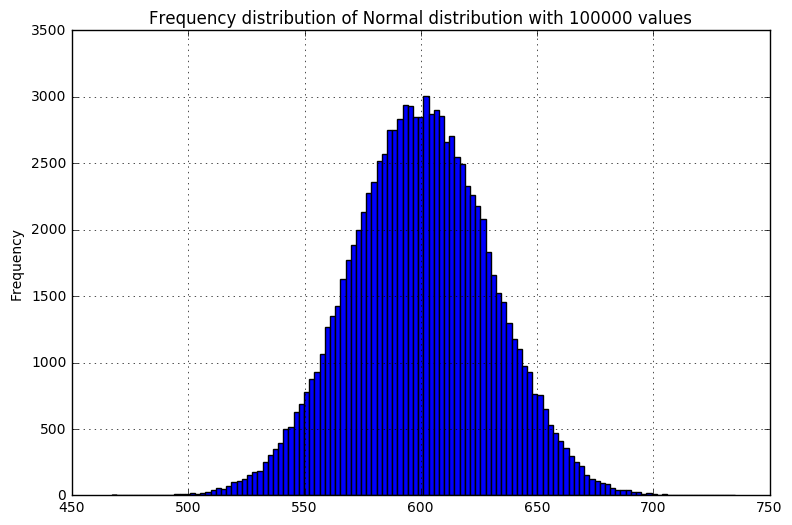

count    100000.000000
mean        599.895210
std          30.066581
min         467.232628
25%         579.567545
50%         599.856672
75%         620.286523
max         734.979356
dtype: float64
Emperical 95% CIs
[ 540.96753384  658.6855989 ]
 


'Done!'

In [6]:
nums = [100, 1000, 10000, 100000]
sim_normal(nums)

- The median and mean converge to the theoretical values as the number of realizations (computed values) increases from 100 to 100,000. Likewise, the confidence intervals converge to their theoretical values. 
- The histogram of computed values comes to resemble the bell-shaped curve of the theoretical Normal distribution as the number of realizations increases. Note that the histograms are affected by the quantization or binning of the values, which gives a somewhat bumpy appearance. 

#### Simulate Customers Using a Poisson Distribution

In [7]:
def sim_poisson(nums, mean = 600):
    for n in nums:
        dist = nr.poisson(lam = mean, size = n)
        titl = 'Poisson distribution with ' + str(n) + ' values'
        print(dist_summary(dist, titl))    
        print('Emperical 95% CIs')
        print(np.percentile(dist, [2.5, 97.5]))
        print(' ')
    return('Done!')

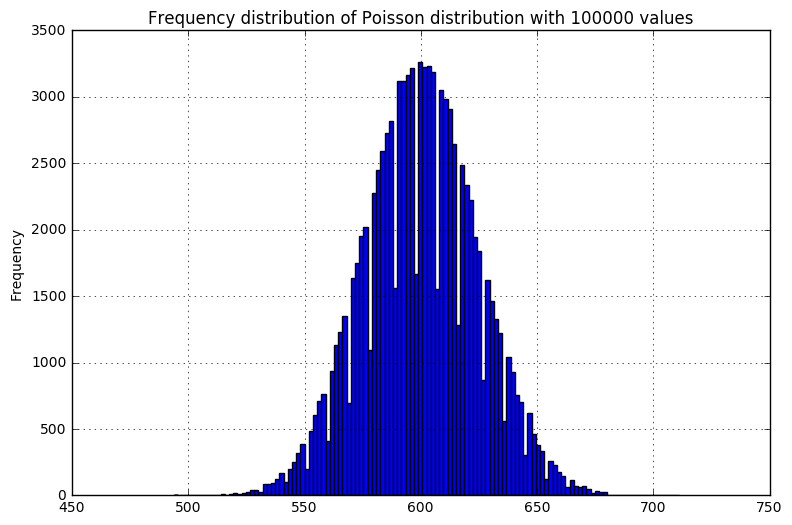

count    100000.000000
mean        600.053980
std          24.509882
min         494.000000
25%         583.000000
50%         600.000000
75%         616.000000
max         711.000000
dtype: float64
Emperical 95% CIs
[ 553.  648.]
 


'Done!'

In [8]:
sim_poisson([100000])

Results
- The mean and median (shown here as the 50% quantile) are at the theoretical values for the Normal distribution.
- The 95% two-sided confidence intervals differ only slightly from those for the Normal distribution. 
- The values generated from a Poisson distribution are integers, which are reflected in the integer values for all the summary statistics. Further, this property leads to the uneven binning seen in the histogram.
- Despite the uneven binning, the general shape of the histogram is nearly identical to that for the Normal distribution. 
- Overall it is safe to conclude that for the large value of the mean for the number of customer arrivals there is no substantial difference between the Normal and Poisson distributions. 

### Computing Specialized Random Variables
There are many practical cases where a specialized distribution of values is needed. For the lemonade stand model, the profitability per order and the tip amount per customer visit are not standard distributions. In this case, you will use a Python function to compute these distributions. For the lemonade stand, assume that per order is 5 for 30% of customer visits, 3.5 for another 30% of customer visits, and 4 for the remaining 40% of visits. Assume that the tip is 0 for 50% of customer visits, 0.25 for 20% of visits, 1 for 20% of visits, and 2 for the remaining 10% of visits. 

#### Compute a Distribution for Profits
This function generates random draws from a uniform distribution using the **uniform** function from the **numpy.random** library.

In [9]:
def gen_profits(num):  
    unif = nr.uniform(size = num)
    out = [5 if x < 0.3 else (3.5 if x < 0.6 else 4) for x in unif]
    return(out)

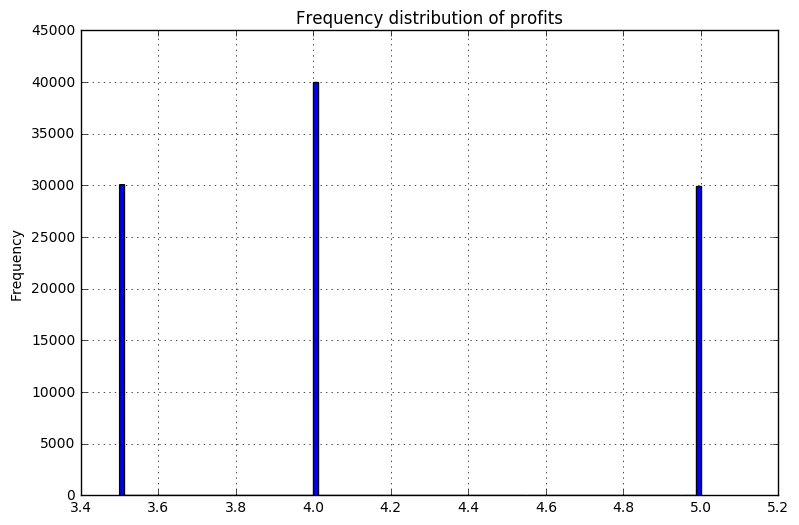

count    100000.000000
mean          4.148915
std           0.593528
min           3.500000
25%           3.500000
50%           4.000000
75%           5.000000
max           5.000000
dtype: float64

In [10]:
prfts = gen_profits(100000)
dist_summary(prfts, 'profits')

#### Compute a Distribution for Tips
This function is nearly identical to the **gen_profits** function, except that there are two levels of nesting of the **if else** statements in the list comprehension.

In [11]:
def gen_tips(num):  
    unif = nr.uniform(size = num)
    out = [0 if x < 0.5 else (0.25 if x < 0.7 
      else (1.0 if x < 0.9 else 2.0)) for x in unif]
    return(out)

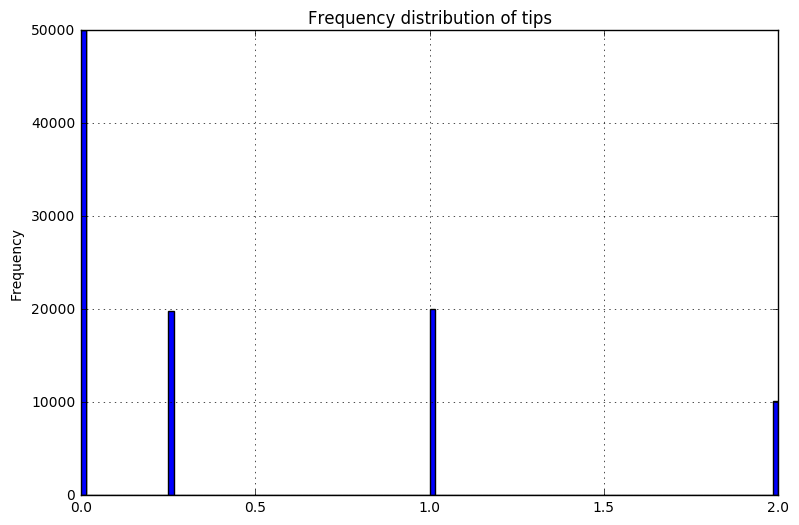

count    100000.000000
mean          0.452170
std           0.642362
min           0.000000
25%           0.000000
50%           0.250000
75%           1.000000
max           2.000000
dtype: float64

In [12]:
tps = gen_tips(100000)
dist_summary(tps, 'tips')

###  Simulating Lemonade Stand Income
compute the distribution of total net daily income for the lemonade stand based on the number of visits, profit per sale, and tips. To compute total net income requires pulling together the pieces from the previous exercises and combining these results to form an overall model of lemonade stand income.

- The amount chanrged for lemondade is based on the weather. This means that the net profit per visit and the number of visits per day are independent. Therefore the profits on a given day can be represented by:
$$Profits_i = \Sigma_i p(arrivals_i)\ p(price_i) \\
where \\
Profits_i = net profits\ on\ the\ ith\ day\\
arrivals_i = arrivals\ per\ day\\
price_i = price\ of\ lemondade\ per\ day$$  

- We will also assume that all customers on the same day leave the same tip.  This means that the tip per visit and the number of visits per day are independent. Therefore the tips on a given day can be represented by:
$$Tips_i = \Sigma_i p(arrivals_i)\ p(tip_i) \\
where \\
Tips_i = Tips\ on\ the\ ith\ day\\
arrivals_i = arrivals\ per\ day\\
tip_i = tip\ for\ ith\ day$$  

- We assume that profit per cup of lemondae is independent of tip left by the customer on each day. The frequency distribution of daily net income is modeled as: 

$$P(net) = P(profit) + P(tips) \\
where P(net) = probability\ distribution\ of\ net\ income\\ 
p(profit) = distribution of daily profit, \\
p(tips) = distribution of daily tip$$ 

#### Create a Function to Simulate Lemonade Stand Income
function that computes customer arrivals, profit per customer, profit per day, tips per customer, tips per day, and total daily income. Depending on the value of the pois argument, customer arrivals can be simulated from either a Normal or Poisson distribution.

In [13]:
def sim_lemonade(num, mean = 600, sd = 30, pois = False):
    ## Simulate the profits and tips for
    if pois:
        arrivals = nr.poisson(lam = mean, size = num)
    else:
        arrivals = nr.normal(loc = mean, scale = sd, size = num) 
        
    print(dist_summary(arrivals, 'customer arrivals per day'))
  
    ## Compute distibution of average profit per arrival
    proft = gen_profits(num)
    print(dist_summary(proft, 'profit per arrival'))
  
    ## Total profits are profit per arrival 
    total_profit = arrivals * proft 
    print(dist_summary(total_profit, 'total profit per day'))
  
    ## Compute distribution of average tips per arrival
    tps = gen_tips(num)
    print(dist_summary(tps, 'tips per arrival'))
  
    ## Compute average tips per day
    total_tips = arrivals * tps
    print(dist_summary(total_tips, 'total tips per day'))
  
    ## Compute total profits plus total tips.
    total_take = total_profit + total_tips 
    return(dist_summary(total_take, 'total net per day'))

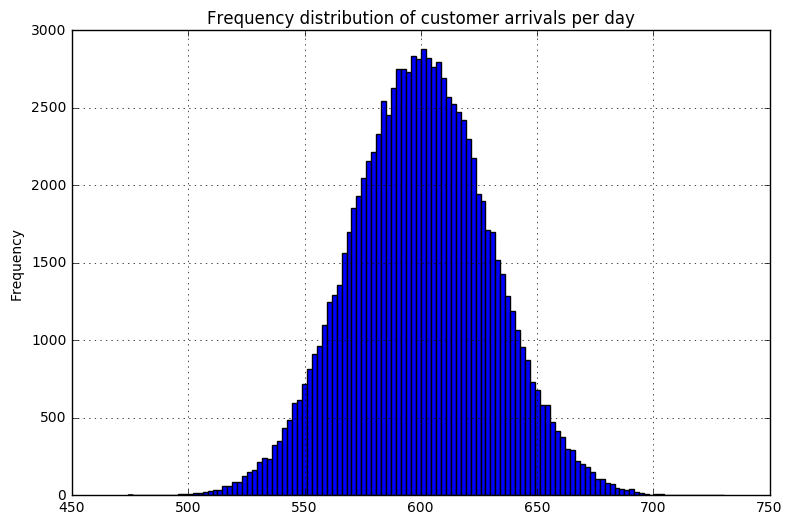

count    100000.000000
mean        599.907284
std          30.014611
min         474.159237
25%         579.605159
50%         599.970127
75%         620.110189
max         730.293828
dtype: float64


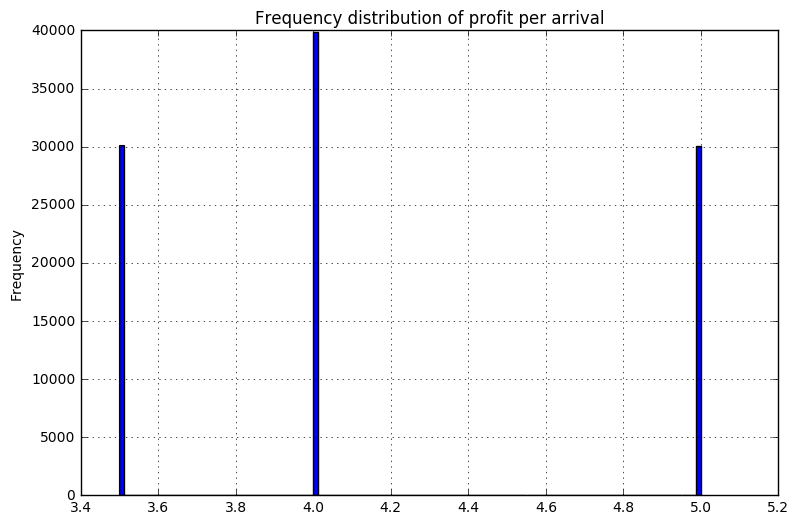

count    100000.000000
mean          4.149750
std           0.594141
min           3.500000
25%           3.500000
50%           4.000000
75%           5.000000
max           5.000000
dtype: float64


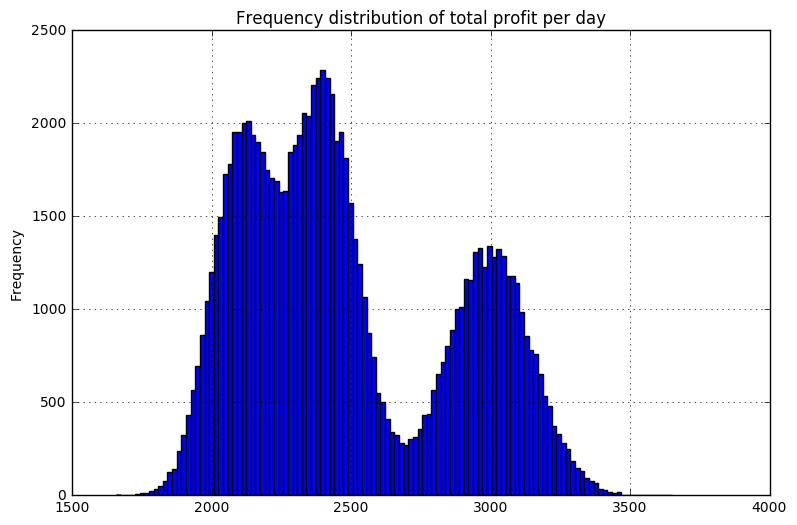

count    100000.000000
mean       2489.392412
std         377.346909
min        1659.557330
25%        2182.685796
50%        2400.745908
75%        2853.765922
max        3651.469138
dtype: float64


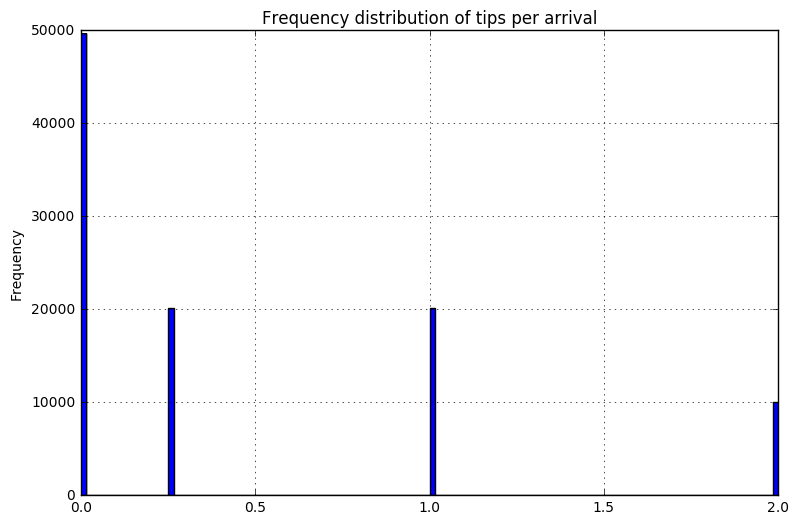

count    100000.000000
mean          0.453335
std           0.641323
min           0.000000
25%           0.000000
50%           0.250000
75%           1.000000
max           2.000000
dtype: float64


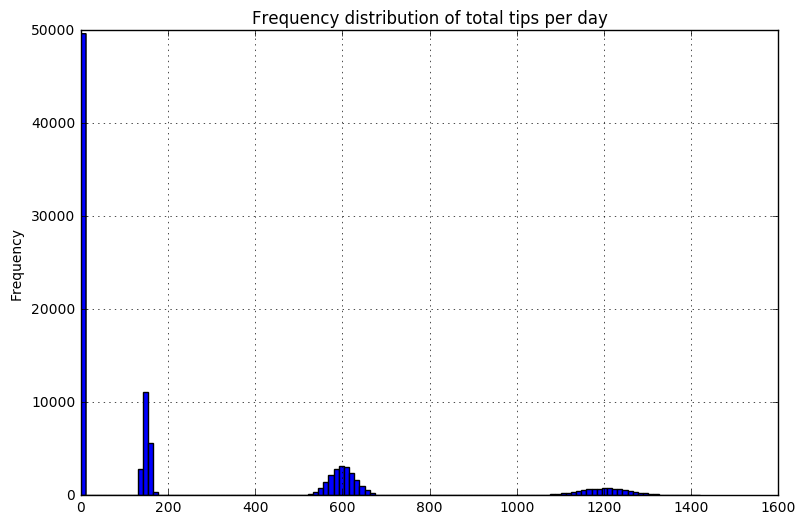

count    100000.000000
mean        271.972482
std         385.510435
min           0.000000
25%           0.000000
50%         134.128011
75%         580.916698
max        1419.922988
dtype: float64


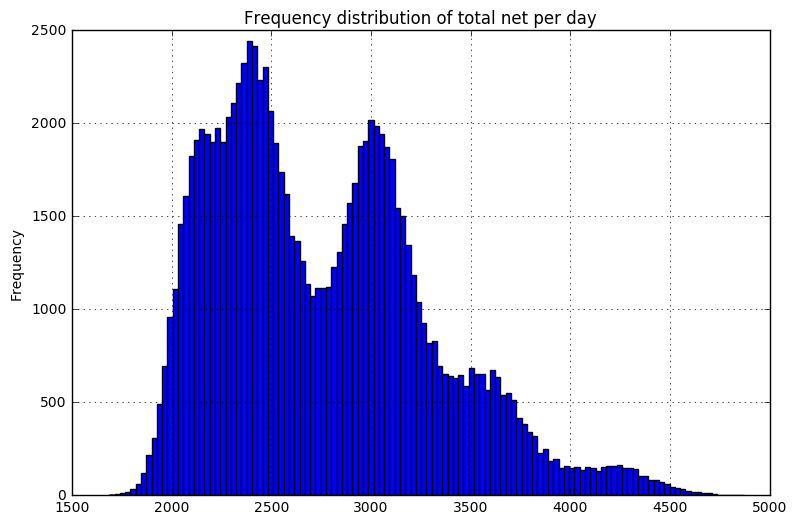

count    100000.000000
mean       2761.364894
std         542.637678
min        1687.457147
25%        2327.799558
50%        2670.227043
75%        3102.016203
max        4869.976115
dtype: float64

In [14]:
sim_lemonade(100000)

Examine each of the plots and the corresponding summary statistics:
- The Normal distribution of the customer arrivals is as expected with a mean and median of 600. 
- The distribution of profits per arrival appears as was observed previously.
- The distribution of total profits per day, is the vector product of arrivals per day and profits per arrival. Note, that this result is a complex distribution which would be difficult to handle except by simulation.
- The distribution of tips per arrival appears as was observed previously.
- The distribution of total tips per day is the vector product of arrivals per day and tips per arrival. Again, this result is a complex distribution which would be difficult to handle except by simulation.
- The distribution of the final total net profit per day is the sum of the distribution of total profits per day and the distribution of total tips per day. This final distribution is quite complex with five peaks. 